## Calculate the stability margin in 2D

# Imports

In [1]:
import os
from datetime import datetime
from time import time

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p

import casadi as ca
import aerosandbox as asb
import aerosandbox.numpy as np
from aerosandbox.tools.pretty_plots import plt, show_plot, set_ticks  # sets some nice defaults

# Parameters

In [2]:
# %% Inputs
Re = 1.3e6 #Upwind conditions
mach = 0.0
alpha_multipoints = np.arange(2,13)

# Data extraction

In [3]:
# %% Import airfoil from .dat file
folder_name = "Airfoils"
list_results = []
for file in os.listdir(folder_name):
    airfoil = asb.Airfoil(coordinates = (os.path.join(os.getcwd(), "Airfoils", file)), name=file)
    print(f'data extracted from : {file}\n')

    CL_multipoint = np.array(
        asb.XFoil(airfoil=airfoil, Re=Re, xfoil_command="xfoil").alpha(alpha_multipoints)["CL"]
    )
    CM_multipoint = np.array(
        asb.XFoil(airfoil=airfoil, Re=Re, xfoil_command="xfoil").alpha(alpha_multipoints)["CM"]
    ) # at 25% of the chord

    results = {
        "Xcp":-CM_multipoint/CL_multipoint + 0.25,
        "Cl":CL_multipoint,
        "name":airfoil.name
    }
    list_results.append(results)

data extracted from : Limit stability.dat

data extracted from : R1 V4.dat

data extracted from : R1 V5 Satori 3.dat

data extracted from : R1 V5.dat

data extracted from : VMG.dat



# Plots

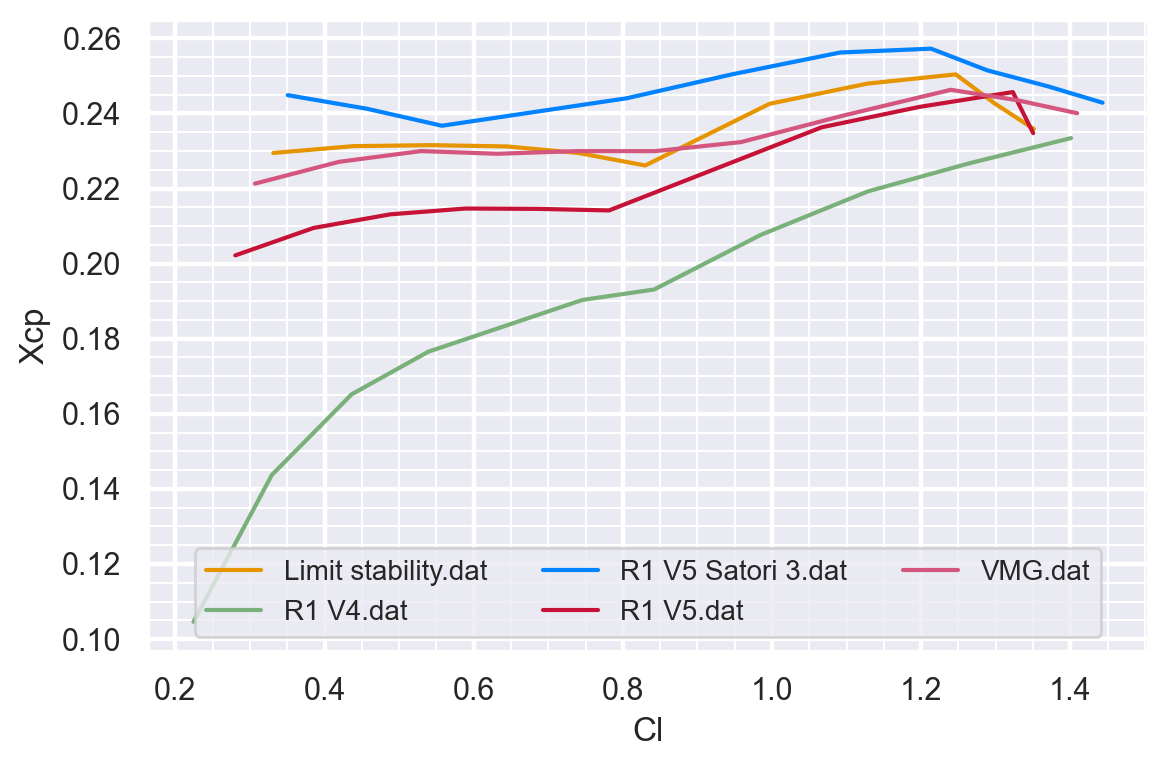

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for i, af in enumerate(
    list_results
):
    color = p.adjust_lightness(["orange", "darkseagreen", "dodgerblue", "crimson", "palevioletred", "gray"][i], 0.9)
    ax.plot(
        af["Cl"],af["Xcp"],
        color=color,
        label=af["name"],
    )

ax.legend(fontsize=10, loc="lower center", ncol=3)
ax.set_xlabel("Cl")
ax.set_ylabel("Xcp")

p.show_plot("", legend=False)